In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Speeches
### 111 th bound edition 
### 1. Bigrams
- **By party** 
- By Congressperson

In [3]:
# Partisan bigram
party2gram = pd.read_table("./data/hein-bound/byparty_2gram_111.txt", sep = "|")
party2gram.head()

,party,phrase,count
0,D,0 0,29
1,D,0 000,1
2,D,0 01,1
3,D,0 0100,1
4,D,0 02,1


### 2. Speech related
- **Speech Metadata**
- **Full text**
- Speaker Metadata

In [33]:
# Speech Meta
speechmeta = pd.read_table("./data/hein-bound/descr_111.txt", sep = "|")
speechmeta.head()

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,1110000001,H,20090106,1,The CLERK,Unknown,Unknown,Unknown,Special,66,70,01062009.txt,107,16
1,1110000002,H,20090106,2,The CLERK,Unknown,Unknown,Unknown,Special,77,100,01062009.txt,836,134
2,1110000003,H,20090106,3,The CLERK,Unknown,Unknown,Unknown,Special,565,591,01062009.txt,219,37
3,1110000004,H,20090106,4,The CLERK,Unknown,Unknown,Unknown,Special,593,613,01062009.txt,596,92
4,1110000005,H,20090106,5,The CLERK,Unknown,Unknown,Unknown,Special,616,622,01062009.txt,200,34


In [29]:
hein_bound_direc = "./data/hein-bound/"
daily_bound_direc = "./data/daily-bound"
hein_bound_files = os.listdir(hein_bound_direc)
hein_meta_files = []
for f in hein_bound_files:
    if f.startswith("descr"):
        hein_meta_files.append(os.path.join(hein_bound_direc,f))
hein_meta_files.sort()

In [30]:
char_count = []
word_cound = []
num_speeches = []            
for f in hein_meta_files:
    df = pd.read_table(f, sep = "|", encoding="latin")
    char_count += df["char_count"].tolist()
    word_cound += df["word_count"].tolist()
    num_speeches.append(df.shape[0])

In [33]:
x = [os.path.splitext(os.path.split(i)[-1])[0].split("_")[-1] for i in hein_meta_files]

<BarContainer object of 69 artists>

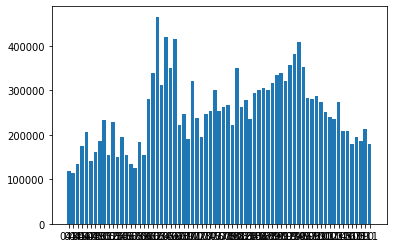

In [36]:
plt.bar(x,num_speeches)

In [41]:
sum(word_cound)/len(word_cound)

106.39143265153987

In [62]:
import spacy
from spacy import displacy
import nltk

In [43]:
filepath = "./data/hein-bound/speeches_111.txt"
with open(filepath, errors="ignore") as f:
    speech = f.readlines()
    speech = [s.replace("\n", "").replace(" | ", " ").split("|") for s in speech]
pd.DataFrame(speech[1:], columns = speech[0]).head()            

,speech_id,speech
0,1110000001,The Representativeselect and their guests will...
1,1110000002,As directed by law. the Clerk of the House has...
2,1110000003,The quor closes that 428 Represer have respond...
3,1110000004,Credentials. regular in form. have been receiv...
4,1110000005,The Clerk is in receipt of a letter of resigna...


In [65]:
spwithq=[q for q in speech if q[1].find("?")+1] #speech having questions
spwithq = [[q[0], nltk.sent_tokenize(q[1])] for q in spwithq] # split speech in sentences

In [83]:
questions = [[i[0], [q for q in i[1] if q.find("?")+1]] for i in spwithq]

In [117]:
q_corpus = []
for q in questions:
    q_corpus += q[1]
q_corpus = list(set(q_corpus))
q_corpus.sort()

In [118]:
q_corpus

['"-and we mean it?"',
 '"374?',
 '"Am I missing something?"',
 '"And Aint I a Women?"',
 '"And how do we develop missions and provide resources so that we are using all of our capabilities on behalf of our national security?"',
 '"And how were you recorded?"',
 '"And in 3 years it disappears?"',
 '"Are American taxpayers getting what they paid for?"',
 '"Are Mini Med Policies Really Health Insurance?"',
 '"Are Republicans Serious About Fixing Health Care?',
 '"Are We Ready?',
 '"Are You Smarter than a FifthGrader?"',
 '"Are these people charged with immigration violations or are they charged with other crimes?"',
 '"Are these people going to take away bonuses that taxpayers have paid for?"',
 '"Are we in for a tax hike?"',
 '"Are we now going to be expected to pay for someone elses losses when Im struggling to keep paying my own mortgage?"',
 '"Are we there yet?"',
 '"Are we willing?"',
 '"Are you a fighter?',
 '"Are you aware there is up to a 50 percent tax credit for every insurance

In [92]:
sample_speech = speech[341]
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_speech[1])
displacy.serve(doc, style="ent")

/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


ParserError if directly read from original file

## Vocabulary

## Topics

In [26]:
topic_phrases = pd.read_table("./data/topic_phrases.txt", delimiter="|")
keywords = pd.read_table("./data/keywords.txt", delimiter="|")
false_matches = pd.read_table("./data/false_matches.txt", delimiter="|")

ParserError: Error tokenizing data. C error: Expected 2 fields in line 48, saw 3


In [36]:
keywords.head(20)

,topic,phrase
0,alcohol,alcohol
1,alcohol,antisaloon
2,alcohol,distil
3,alcohol,liquor
4,alcohol,malt
5,alcohol,saloon
6,alcohol,spirit
7,budget,balanc
8,budget,budget
9,budget,debt


## Partisan Phrases
1000 most partisan bigrams in each session

In [38]:
with open("./data/hein-bound/partisan_phrases_111.txt") as f:
    partisan_phrases_111 = f.read()

FileNotFoundError: [Errno 2] No such file or directory: './data/hein-bound/partisan_phrases_111.txt'

In [134]:
import requests
import os
import urllib

## Naive query to Concept Web API

In [159]:
token = "c/en/antisaloon"
api_path = "http://api.conceptnet.io"
query_path = urllib.parse.urljoin(api_path, token)
print()
print(query_path)
keep_query = True
graph = []
while keep_query:
    query = requests.get(query_path)
    if query.status_code == 200:
        results = query.json()
        if "error" not in results.keys():
            graph += results["edges"]
            if "view" in results.keys() and "nextPage" in results['view'].keys():
                print("Continue to query next page...")
                np = results['view']['nextPage']
                query_path = urllib.parse.urljoin(api_path, np)
                print(query_path)
            else:
                keep_query = False
                print("All pages of {} queried!".format(token))
                
    


http://api.conceptnet.io/c/en/antisaloon
All pages of c/en/antisaloon queried!


In [158]:
results.keys()

dict_keys(['@context', '@id', 'edges'])